In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
INPUT_PATH = "C:/Users/muham/Documents/SIDE/PUSKA API/datasets/raw/susu_kambing_real.xlsx"

In [8]:
raw_df = pd.read_excel(INPUT_PATH)

In [9]:
raw_df.head()

,id,sk_produk,nama_produk,sk_unitpeternakan,nama_unit,tgl_produksi,jumlah
0,1.0,3,Susu Segar,21,PROF Farm,2022-04-01,10.20
1,2.0,3,Susu Segar,21,PROF Farm,2022-04-02,10.35
2,3.0,3,Susu Segar,21,PROF Farm,2022-04-03,10.70
3,4.0,3,Susu Segar,21,PROF Farm,2022-04-04,11.90
4,5.0,3,Susu Segar,21,PROF Farm,2022-04-05,12.00


In [10]:
raw_df.dtypes

id                          float64
sk_produk                     int64
nama_produk                  object
sk_unitpeternakan             int64
nama_unit                    object
tgl_produksi         datetime64[ns]
jumlah                      float64
dtype: object

In [11]:
raw_df['sk_produk'].value_counts()

sk_produk
3    531
Name: count, dtype: int64

In [12]:
raw_df['nama_produk'].value_counts()

nama_produk
Susu Segar    531
Name: count, dtype: int64

In [13]:
raw_df['sk_unitpeternakan'].value_counts()

sk_unitpeternakan
21    365
16    166
Name: count, dtype: int64

In [14]:
raw_df['nama_unit'].value_counts()

nama_unit
PROF Farm    365
NYX Farm     166
Name: count, dtype: int64

In [15]:
raw_df['tgl_produksi'] = raw_df['tgl_produksi'].dt.date

In [16]:
prof_df = raw_df[['nama_unit', 'tgl_produksi', 'jumlah']].loc[raw_df['nama_unit'] == 'PROF Farm'].reset_index(drop=True)
nyx_df = raw_df[['nama_unit', 'tgl_produksi', 'jumlah']].loc[raw_df['nama_unit'] == 'NYX Farm'].reset_index(drop=True)

# PROF FARM DATA

In [17]:
prof_df.sort_values(by='tgl_produksi', inplace=True)
prof_df.drop(columns='nama_unit', inplace=True)

In [18]:
prof_date_ranges_series = pd.date_range(
    start=min(prof_df['tgl_produksi']), 
    end=max(prof_df['tgl_produksi']), 
    freq='D'
)

In [19]:
prof_date_ranges_series.difference(prof_df['tgl_produksi'])

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [20]:
prof_df['jumlah'].isnull().sum()

0

In [21]:
prof_df.loc[prof_df['jumlah'] == 0].head(10)

,tgl_produksi,jumlah
120,2022-07-30,0.0
121,2022-07-31,0.0


In [23]:
count_day_for_mean = 7

for index, row in prof_df.iterrows():
    if row['jumlah'] == 0:
        if index > (count_day_for_mean - 1):
            start_index = index - count_day_for_mean
            end_index = index

            temp_df = prof_df.iloc[start_index:end_index, :]      
        else:
            temp_df = prof_df.iloc[:index, :]
            
        avg = temp_df['jumlah'].mean()
        prof_df.loc[prof_df['tgl_produksi'] == row['tgl_produksi'], 'jumlah'] = avg

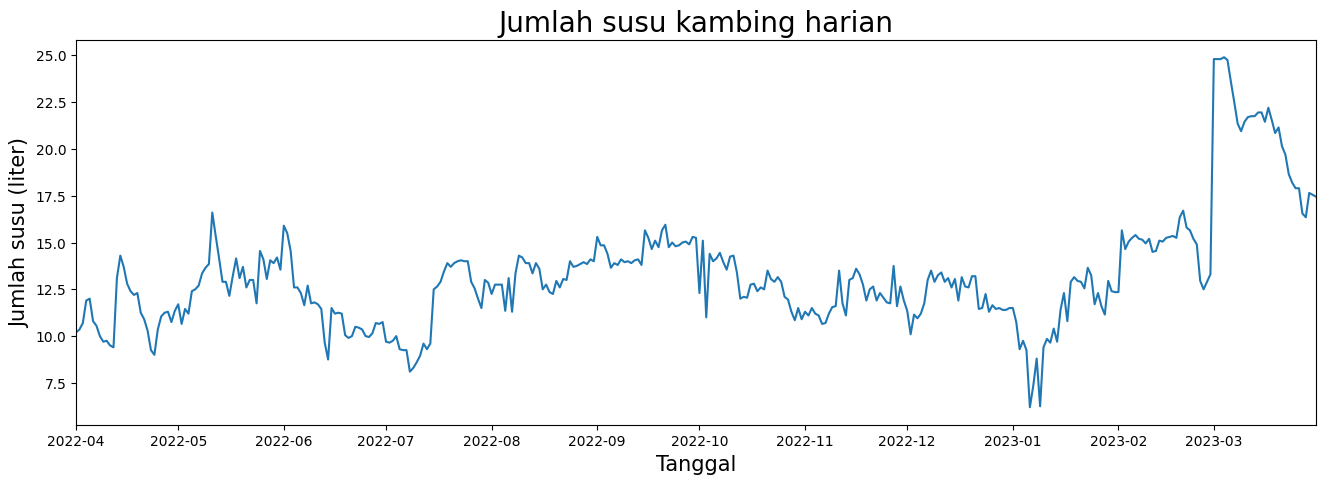

In [25]:
plot_df = prof_df.copy()
plot_df = plot_df.set_index('tgl_produksi')

fig = plt.subplots(figsize=(16, 5))

plt.plot(plot_df.index, plot_df['jumlah'])
plt.title('Jumlah susu kambing harian', fontsize=20)
plt.xlabel('Tanggal', fontsize=15)
plt.ylabel('Jumlah susu (liter)', fontsize=15)
plt.xlim(plot_df.index.min(), plot_df.index.max())

plt.xticks()
plt.savefig('C:/Users/muham/Documents/SIDE/PUSKA API/plots/EDA/TREND - PROF FARM.jpg')

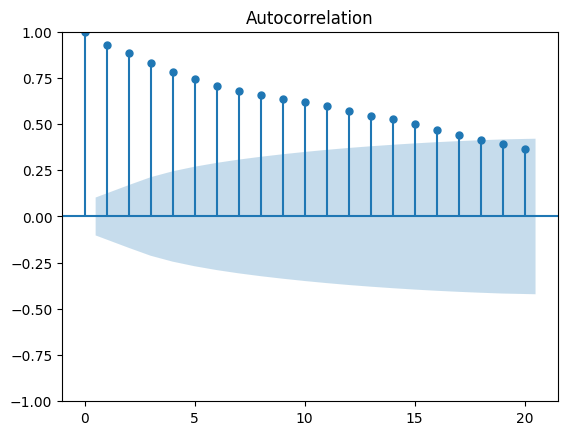

In [26]:
plot_acf(prof_df['jumlah'], lags=20)
plt.savefig('C:/Users/muham/Documents/SIDE/PUSKA API/plots/EDA/ACF - PROF FARM.jpg')
plt.show()

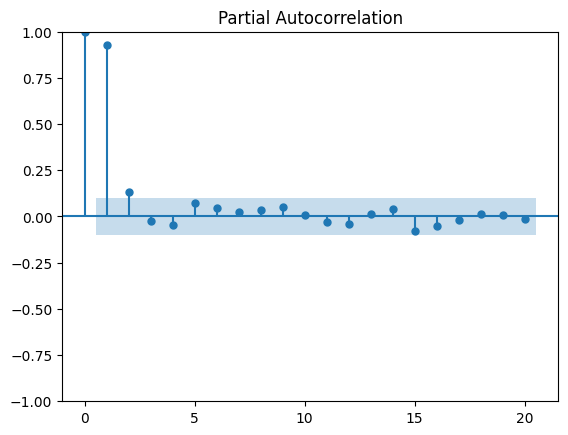

In [27]:
plot_pacf(prof_df['jumlah'], lags=20)
plt.savefig('C:/Users/muham/Documents/SIDE/PUSKA API/plots/EDA/PACF - PROF FARM.jpg')
plt.show()

In [28]:
prof_df.rename(
    columns={
        'tgl_produksi': 'ds',
        'jumlah': 'y'
    },
    inplace=True
)

In [29]:
prof_df.to_excel('C:/Users/muham/Documents/SIDE/PUSKA API/datasets/preprocess/prof_farm.xlsx', index=False)

# NYX FARM

In [30]:
nyx_df.sort_values(by='tgl_produksi', inplace=True)
nyx_df.drop(columns='nama_unit', inplace=True)

In [31]:
nyx_date_ranges_series = pd.date_range(
    start=min(nyx_df['tgl_produksi']), 
    end=max(nyx_df['tgl_produksi']), 
    freq='D'
)

In [32]:
nyx_date_ranges_series.difference(nyx_df['tgl_produksi'])

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [33]:
nyx_df['jumlah'].isnull().sum()

0

In [34]:
nyx_df.loc[nyx_df['jumlah'] == 0].head(10)

,tgl_produksi,jumlah
41,2022-10-27,0.0
126,2023-01-20,0.0
127,2023-01-21,0.0


In [35]:
count_day_for_mean = 7

for index, row in nyx_df.iterrows():
    if row['jumlah'] == 0:
        if index > (count_day_for_mean - 1):
            start_index = index - count_day_for_mean
            end_index = index

            temp_df = nyx_df.iloc[start_index:end_index, :]      
        else:
            temp_df = nyx_df.iloc[:index, :]

        avg = temp_df['jumlah'].mean()
        nyx_df.loc[nyx_df['tgl_produksi'] == row['tgl_produksi'], 'jumlah'] = avg

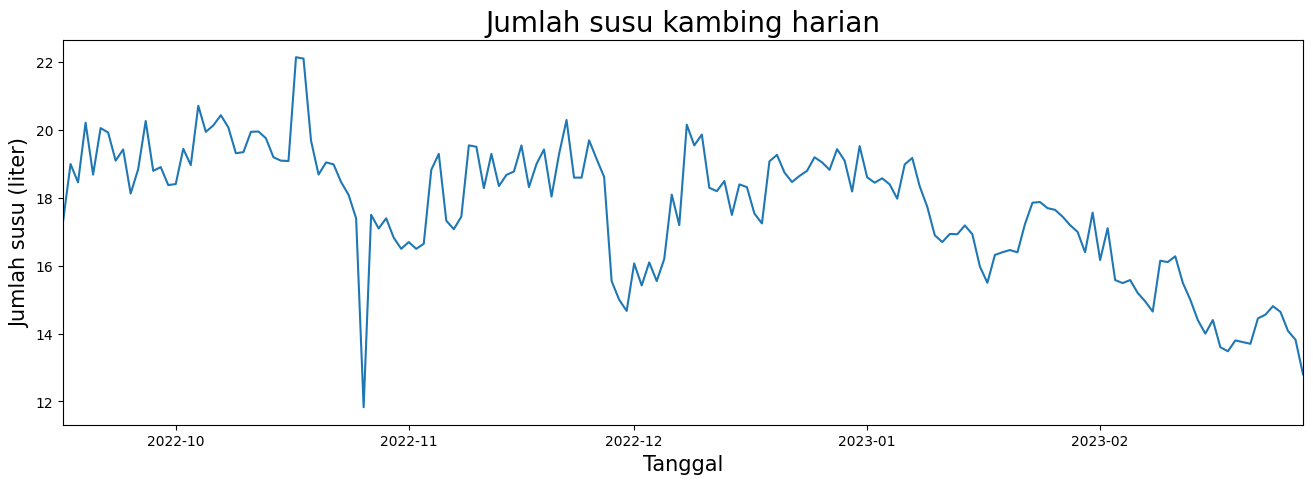

In [37]:
plot_df = nyx_df.copy()
plot_df = plot_df.set_index('tgl_produksi')

fig = plt.subplots(figsize=(16, 5))

plt.plot(plot_df.index, plot_df['jumlah'])
plt.title('Jumlah susu kambing harian', fontsize=20)
plt.xlabel('Tanggal', fontsize=15)
plt.ylabel('Jumlah susu (liter)', fontsize=15)
plt.xlim(plot_df.index.min(), plot_df.index.max())

plt.xticks()
plt.savefig('C:/Users/muham/Documents/SIDE/PUSKA API/plots/EDA/TREND - NYX FARM.jpg')

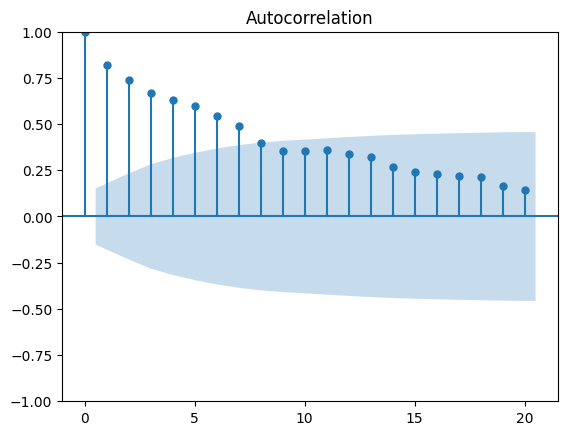

In [38]:
plot_acf(nyx_df['jumlah'], lags=20)
plt.savefig('C:/Users/muham/Documents/SIDE/PUSKA API/plots/EDA/ACF - NYX FARM.jpg')
plt.show()

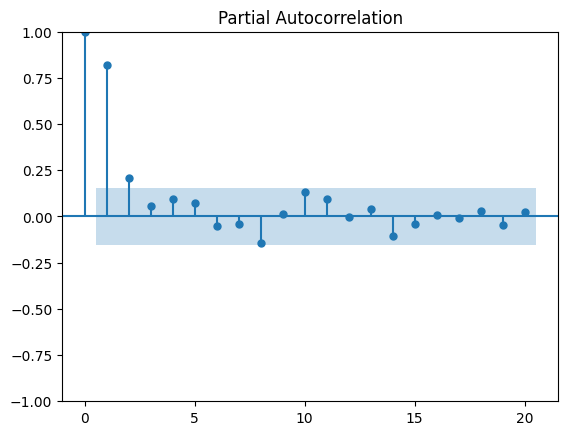

In [39]:
plot_pacf(nyx_df['jumlah'], lags=20)
plt.savefig('C:/Users/muham/Documents/SIDE/PUSKA API/plots/EDA/PACF - NYX FARM.jpg')
plt.show()

In [40]:
nyx_df.rename(
    columns={
        'tgl_produksi': 'ds',
        'jumlah': 'y'
    },
    inplace=True
)

In [41]:
nyx_df.to_excel('C:/Users/muham/Documents/SIDE/PUSKA API/datasets/preprocess/nyx_farm.xlsx', index=False)

# Probolinggo

In [42]:
probolinggo_raw_df = pd.concat([prof_df, nyx_df])

In [43]:
probolinggo_agg_df = probolinggo_raw_df.groupby(probolinggo_raw_df['ds'])['y'].agg('mean').reset_index()

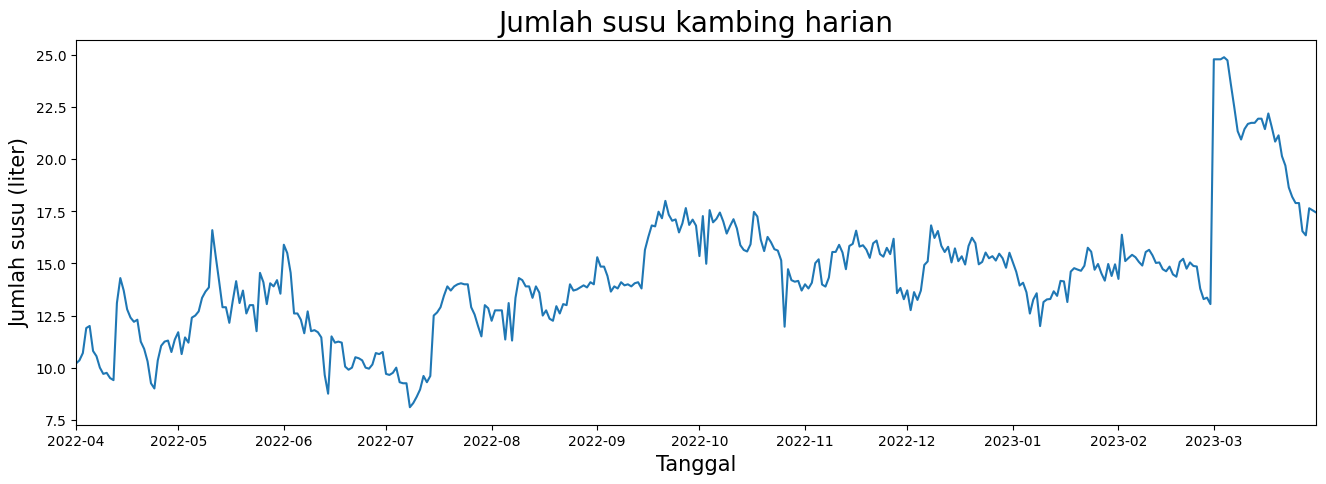

In [45]:
plot_df = probolinggo_agg_df.copy()
plot_df = plot_df.set_index('ds')

fig = plt.subplots(figsize=(16, 5))

plt.plot(plot_df.index, plot_df['y'])
plt.title('Jumlah susu kambing harian', fontsize=20)
plt.xlabel('Tanggal', fontsize=15)
plt.ylabel('Jumlah susu (liter)', fontsize=15)
plt.xlim(plot_df.index.min(), plot_df.index.max())

plt.xticks()
plt.savefig('C:/Users/muham/Documents/SIDE/PUSKA API/plots/EDA/TREND - NYX FARM.jpg')

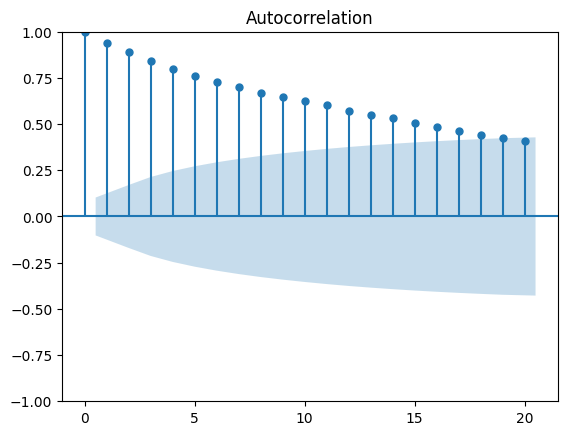

In [48]:
plot_acf(probolinggo_agg_df['y'], lags=20)
plt.savefig('C:/Users/muham/Documents/SIDE/PUSKA API/plots/EDA/ACF - Probolinggo.jpg')
plt.show()

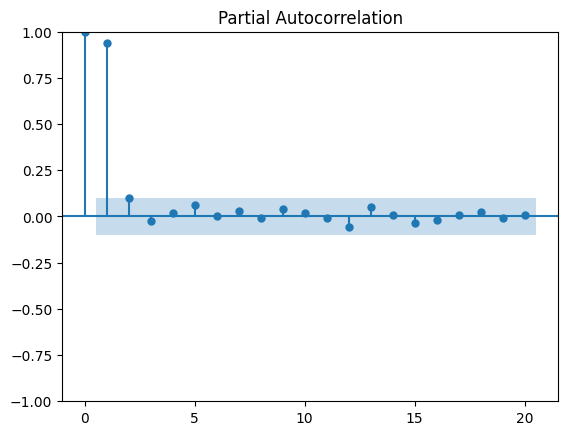

In [49]:
plot_pacf(probolinggo_agg_df['y'], lags=20)
plt.savefig('C:/Users/muham/Documents/SIDE/PUSKA API/plots/EDA/PACF - Probolinggo.jpg')
plt.show()

In [50]:
probolinggo_agg_df.to_excel('C:/Users/muham/Documents/SIDE/PUSKA API/datasets/preprocess/probolinggo.xlsx', index=False)